In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

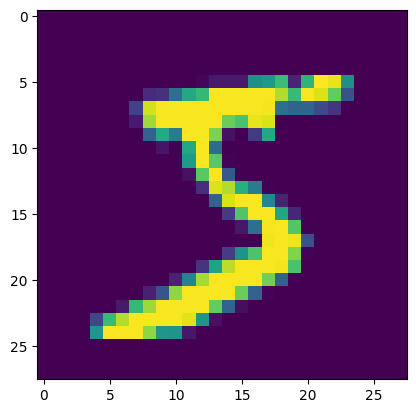

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

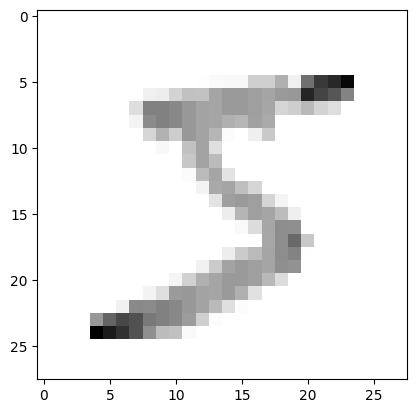

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [12]:
import numpy as np
i=28
i = 28
x_train = np.array(x_train).reshape(-1, i, i, 1)
x_test = np.array(x_test).reshape(-1, i, i, 1)

print("Training Samples Dimension", x_train.shape)
print("Testing Samples Dimension", x_test.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [16]:
print("Total Training samples",len(x_train))

Total Training samples 60000


In [17]:
from keras.src.engine.training import optimizer
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [18]:
hist=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 32s 20ms/step - loss: 0.2220 - accuracy: 0.9302 - val_loss: 0.0772 - val_accuracy: 0.9762
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0725 - accuracy: 0.9781 - val_loss: 0.0635 - val_accuracy: 0.9817
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0514 - val_accuracy: 0.9854
Epoch 4/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0527 - val_accuracy: 0.9833
Epoch 5/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0531 - val_accuracy: 0.9834
Epoch 6/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.0562 - val_accuracy: 0.9850
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0570 -

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
hist.history

{'loss': [0.22199973464012146,
  0.07254177331924438,
  0.05177467688918114,
  0.03844804689288139,
  0.030356809496879578,
  0.023100044578313828,
  0.017869675531983376,
  0.014509262517094612,
  0.013500102795660496,
  0.010458587668836117],
 'accuracy': [0.9302499890327454,
  0.9780833125114441,
  0.9839583039283752,
  0.9876875281333923,
  0.9904583096504211,
  0.992062509059906,
  0.9940624833106995,
  0.9951249957084656,
  0.9954166412353516,
  0.9965416789054871],
 'val_loss': [0.0771564468741417,
  0.06351491063833237,
  0.05135953798890114,
  0.052724238485097885,
  0.05306655541062355,
  0.0562337189912796,
  0.05696818605065346,
  0.0468006394803524,
  0.05174744501709938,
  0.061632946133613586],
 'val_accuracy': [0.9761666655540466,
  0.9816666841506958,
  0.9854166507720947,
  0.9833333492279053,
  0.9834166765213013,
  0.9850000143051147,
  0.984749972820282,
  0.987666666507721,
  0.9860833287239075,
  0.9859166741371155]}

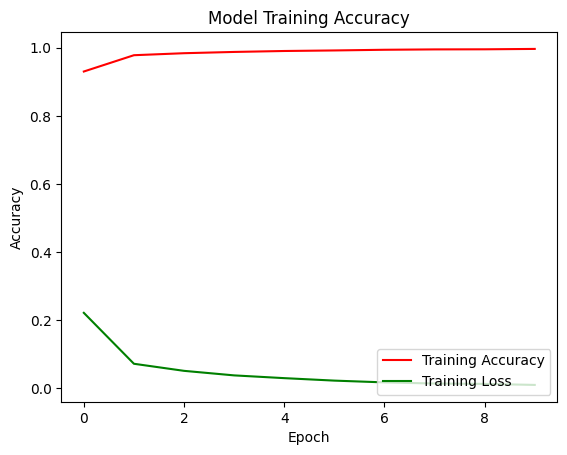

In [22]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], '-r', label='Training Accuracy')
plt.plot(hist.history['loss'], '-g', label='Training Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
